In [1]:
import random
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# 設定隨機種子，使每次產生的資料相同
random.seed(2022)
np.random.seed(2022)

n1 = 200  # 第一類的數量(type1)
n2 = 20   # 第二類的數量(type2)

# 產生type1的data
x = np.random.normal(0, 0.5, n1)
y = np.random.normal(0, 1, n1)
data1 = pd.DataFrame({'label': ['type1'] * n1, 'x': x, 'y': y})

# 產生type2的data
x2 = np.random.normal(2, 0.5, n2)
y2 = np.random.normal(2, 1, n2)
data2 = pd.DataFrame({'label': ['type2'] * n2, 'x': x2, 'y': y2})

# 建立 imbalanced_data
imbalance_data = pd.concat([data1, data2])
print(imbalance_data['label'].value_counts())
# type1    200
# type2     20

label
type1    200
type2     20
Name: count, dtype: int64


In [2]:
# 使用 RandomOverSampler 進行過採樣
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(imbalance_data[['x', 'y']], imbalance_data['label'])
balanced_data_over = X_over
balanced_data_over['label'] = y_over
print(Counter(balanced_data_over['label']))
# Counter({'type1': 200, 'type2': 200})

Counter({'type1': 200, 'type2': 200})


In [3]:
# 使用 SMOTE 進行過採樣
X_smote, label_smote = SMOTE(random_state=2022).fit_resample(imbalance_data[['x', 'y']], imbalance_data['label'])
balanced_data_smote = X_smote
balanced_data_smote['label'] = label_smote
print(Counter(balanced_data_smote['label']))
# Counter({'type1': 200, 'type2': 200})

Counter({'type1': 200, 'type2': 200})


In [4]:
# 使用 RandomUnderSampler 進行欠採樣
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(imbalance_data[['x', 'y']], imbalance_data['label'])
balanced_data_under = X_under
balanced_data_under['label'] = y_under
print(Counter(balanced_data_under['label']))
# Counter({'type1': 20, 'type2': 20})

Counter({'type1': 20, 'type2': 20})


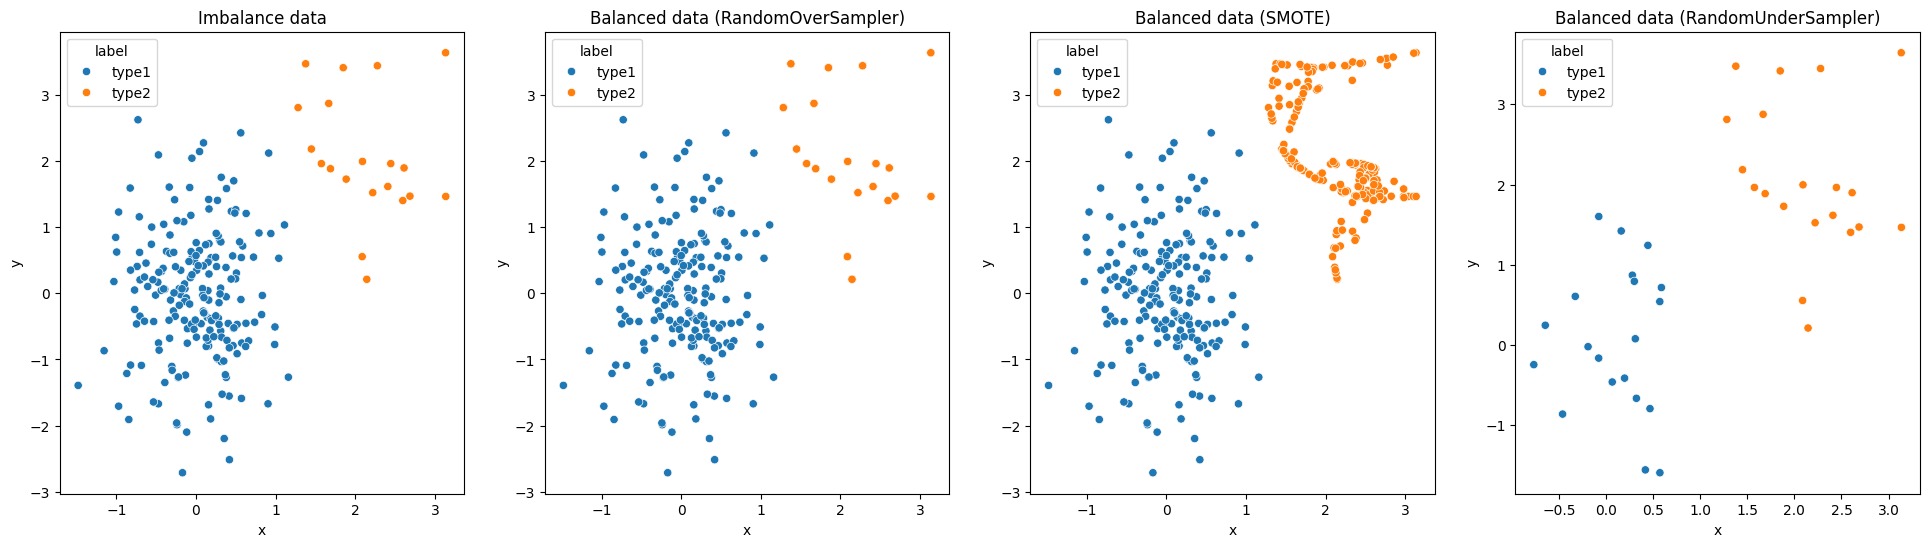

In [5]:
# 繪圖
fig, axs = plt.subplots(ncols=4, figsize=(24, 6))

sns.scatterplot(data=imbalance_data, x='x', y='y', hue='label', ax=axs[0]).set(title='Imbalance data')
sns.scatterplot(data=balanced_data_over, x='x', y='y', hue='label', ax=axs[1]).set(title='Balanced data (RandomOverSampler)')
sns.scatterplot(data=balanced_data_smote, x='x', y='y', hue='label', ax=axs[2]).set(title='Balanced data (SMOTE)')
sns.scatterplot(data=balanced_data_under, x='x', y='y', hue='label', ax=axs[3]).set(title='Balanced data (RandomUnderSampler)')

plt.show()